In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [5]:
from sklearn.datasets import load_iris
import pandas as pd


In [6]:
iris = load_iris()
feature_names = iris.feature_names

df = pd.DataFrame(iris.data, columns=feature_names)
df['target'] = iris.target
mapping = {i: name for i, name in enumerate(iris.target_names)}
df['flower'] = df['target'].map(mapping)

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Missing values: 0

Summary stats:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


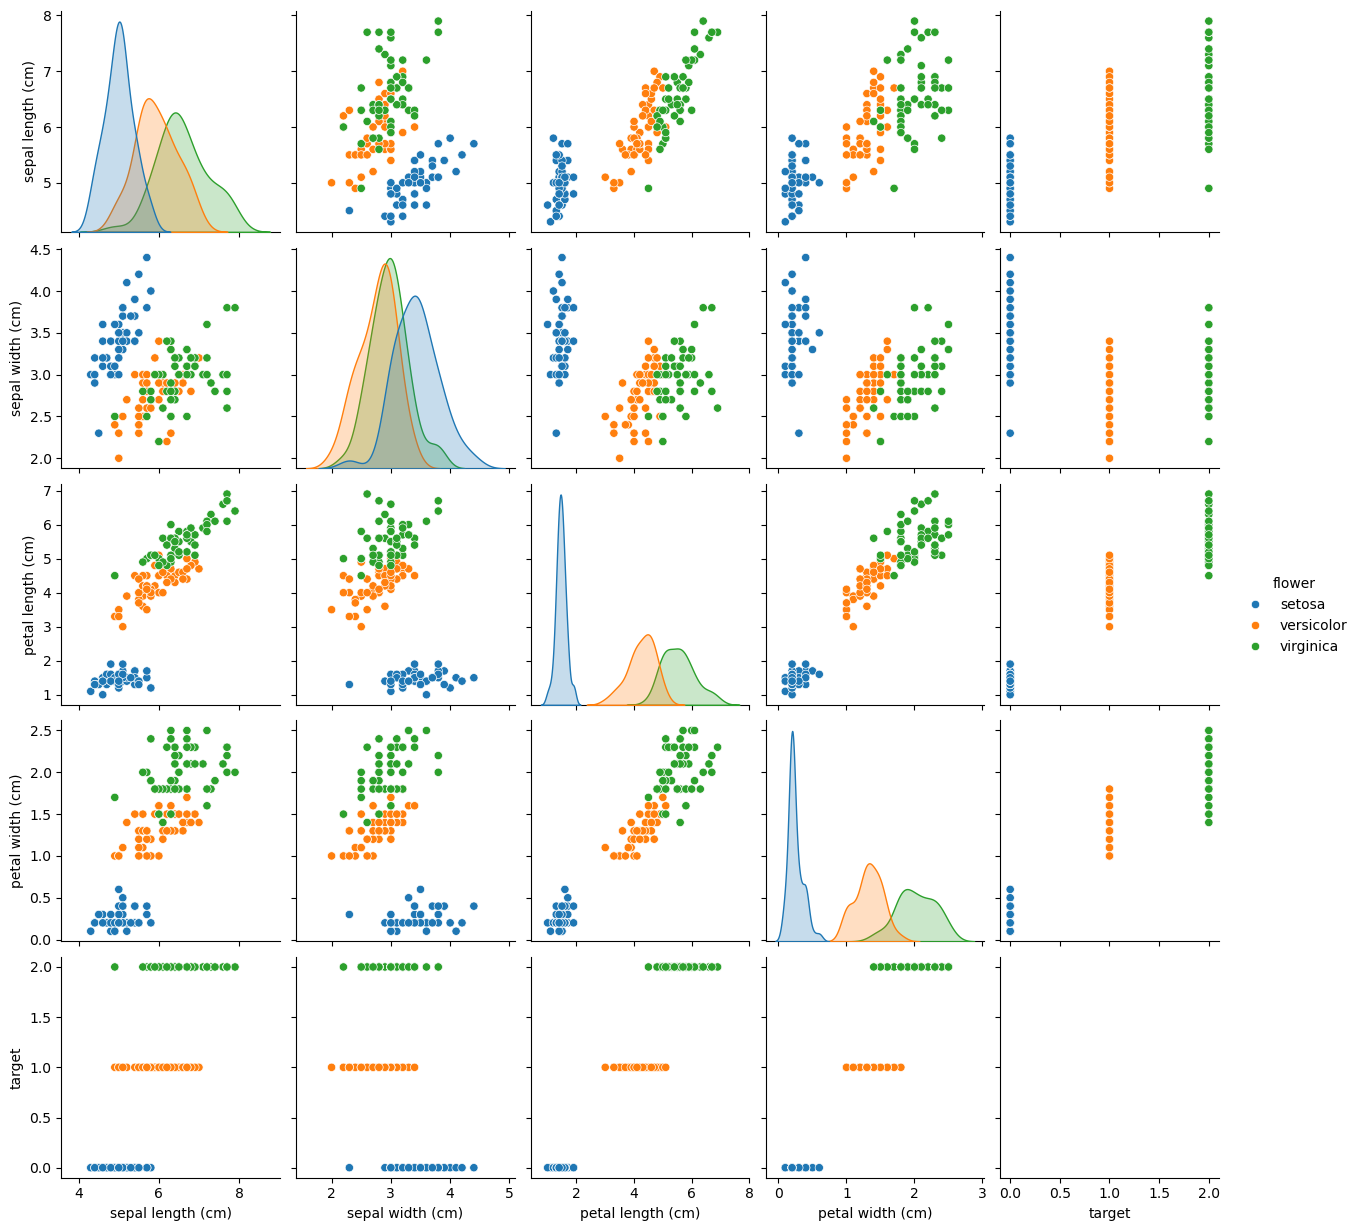

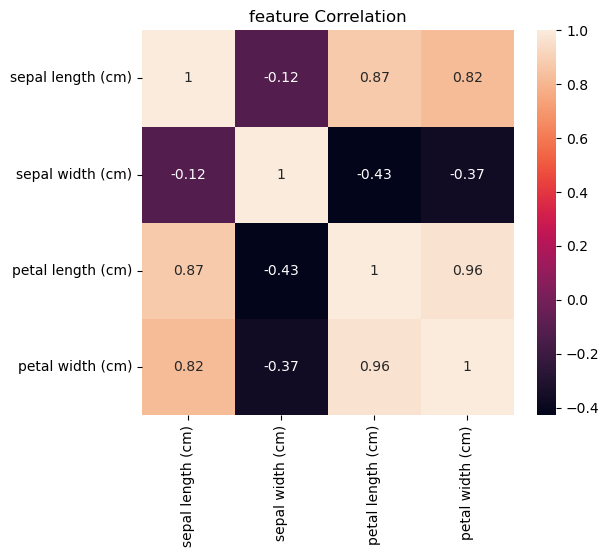

In [7]:
print("Missing values:" , df.isnull().sum().values.sum())
print("\nSummary stats:\n", df.describe())

sns.pairplot(df, hue='flower')
plt.show()

plt.figure(figsize =(6,5))
sns.heatmap(df[feature_names].corr(), annot= True)
plt.title('feature Correlation')
plt.show()

In [8]:
X =df[feature_names].values
y= df['target'].values

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, random_state=42, stratify =y)
print("Train shape:", X_train.shape)
print("Test shape:" , X_test.shape)

Train shape: (120, 4)
Test shape: (30, 4)


In [9]:
pipe_lr = Pipeline([('Scaler',StandardScaler()),('lr' , LogisticRegression(max_iter =200))])
pipe_knn = Pipeline([('Scaler',StandardScaler()),('knn' , KNeighborsClassifier())])
dt = DecisionTreeClassifier(random_state = 42)
rf = RandomForestClassifier(random_state =42)

pipe_lr.fit(X_train, y_train)

param_grid ={'knn__n_neighbors': list(range(1, 11)),'knn__weights': ['uniform','distance']}
grid_knn = GridSearchCV(pipe_knn , param_grid, cv =5)
grid_knn.fit(X_train, y_train)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

print("Best KNN params:", grid_knn.best_params_)


Best KNN params: {'knn__n_neighbors': 5, 'knn__weights': 'uniform'}


Logistic Regression Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



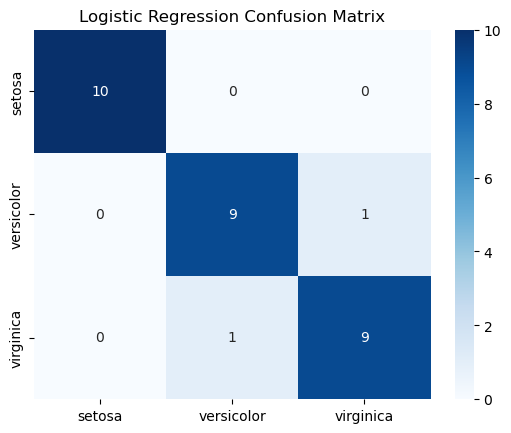

KNN Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



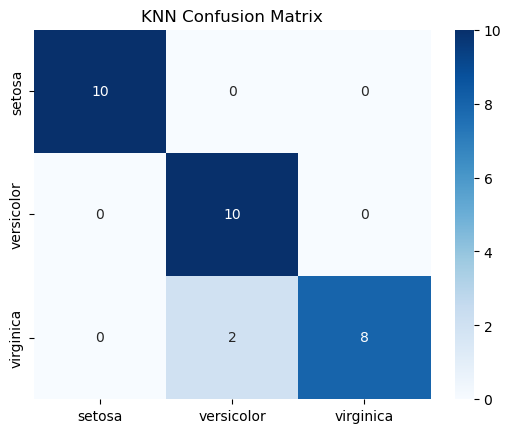

Decision Tree Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



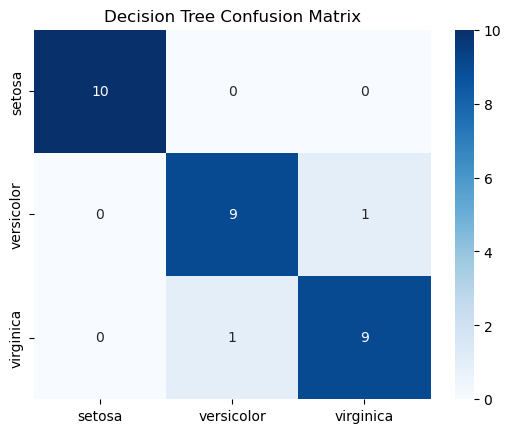

Random Forest Accuracy: 0.9
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



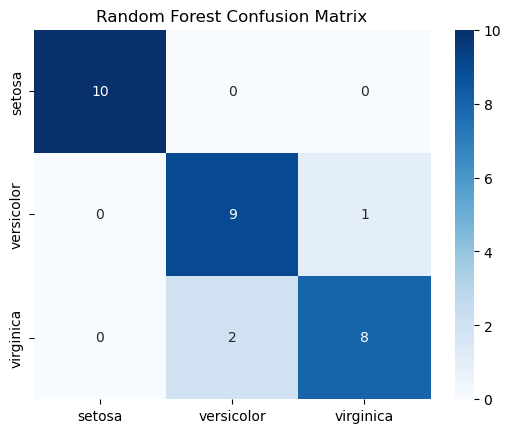

In [13]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names, cmap="Blues")
    plt.title(name + " Confusion Matrix")
    plt.show()

evaluate_model(pipe_lr, X_test, y_test, "Logistic Regression")
evaluate_model(grid_knn.best_estimator_, X_test, y_test, "KNN")
evaluate_model(dt, X_test, y_test, "Decision Tree")
evaluate_model(rf, X_test, y_test, "Random Forest")
    

In [21]:
best_model= rf 
joblib.dump(best_model, 'iris_best_model.pkl')

loaded = joblib.load('iris_best_model.pkl')
sample= np.array([[6.9, 3.1, 5.4, 2.1]])
print("Predicted:",iris.target_names[loaded.predict(sample)][0])

Predicted: virginica
